# Self - Organizing Map

## Training Set

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [47]:
# Load the dataset
df_players = pd.read_parquet('../data/processed/df_players.parquet')
df_players

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM",261.0,82.0,42.0,124.0,18.0,18.0,25.0,25.0,4.0,60.0,51.0,252.0,79.0,51.0,23.0,74.0,34.0,31.0,98.0,278.0,1508.0,663.0,683.0,104.0,2.0,202.59,202.59,15.06,238.60,37472.0,624.533333,326138,1790,69616,"AALIYA, L.",21:02,False,INSTITUTO,INSTITUTO vs QUIMSA (002/12/2024 22:10),Argentino,QUIMSA,02/12/2024,16.716482,5.251921,2.690009,7.941930,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,12.975448,12.975448,0.964560,15.281810,2400.0,40.0,227.0,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,233.6,109.388097,0.664011,5.133521,34,6.870588,18.368627
1,"ACEVEDO, MAXIMILIANO JUNIORS",2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,-6.0,4.0,26.0,15.0,10.0,2.0,0.0,10.79,10.79,1.32,3.00,694.0,11.566667,149814,2305,69510,"ACEVEDO, M.",00:00,False,OBERA,OBERA vs RIACHUELO (LR) (001/12/2024 21:00),Argentino,RIACHUELO,01/12/2024,6.916427,3.458213,3.458213,6.916427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.458213,3.458213,6.916427,0.000000,3.458213,0.000000,0.000000,-20.749280,13.832853,89.913545,51.873199,34.582133,37.314121,37.314121,4.564841,10.374640,2400.0,40.0,4.0,0.000000,25.000000,6.666667,10.000000,8.000000,0.000000,0.000000,25.000000,15.384615,NaN,1.8,66.666667,0.000000,1.853568,4,0.450000,2.891667
2,"ACEVEDO, SEBASTIAN IGNACIO",285.0,104.0,24.0,128.0,24.0,26.0,30.0,1.0,5.0,84.0,65.0,266.0,55.0,59.0,43.0,76.0,46.0,9.0,-12.0,287.0,2047.0,992.0,828.0,64.0,12.0,242.03,249.60,44.73,263.20,50524.0,842.066667,209965,1426,69281,"ACEVEDO, S.",21:53,True,SAN MARTIN (C),SAN MARTIN (C) vs GIMNASIA (CR) (004/12/2024 2...,Argentino,GIMNASIA,04/12/2024,13.538120,4.940226,1.140052,6.080279,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,11.496952,11.856543,2.124772,12.502573,2400.0,40.0,233.0,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,239.4,108.282675,1.341382,2.564103,38,6.300000,22.159649
3,"ACTIS, JOAQUIN MATIAS",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,

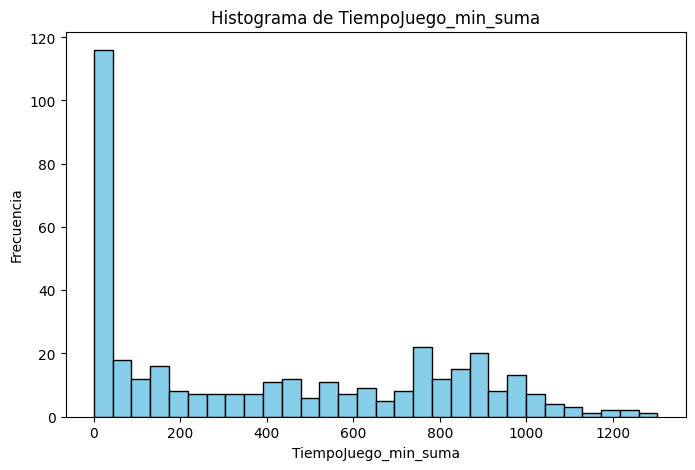

In [48]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['TiempoJuego_min_suma'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('TiempoJuego_min_suma')
plt.ylabel('Frecuencia')
plt.title('Histograma de TiempoJuego_min_suma')
plt.show()

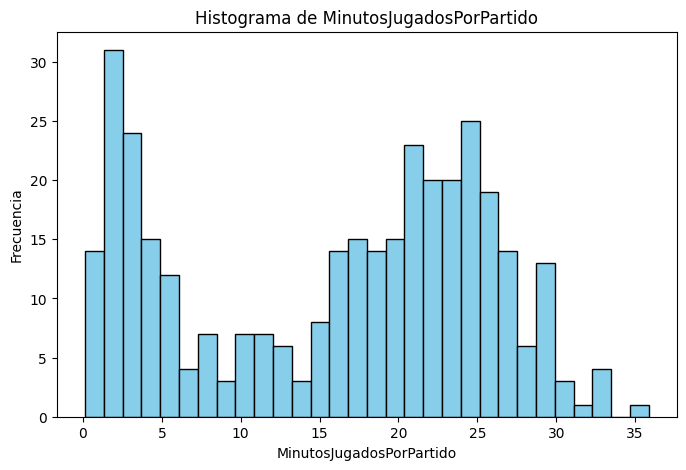

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['MinutosJugadosPorPartido'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('MinutosJugadosPorPartido')
plt.ylabel('Frecuencia')
plt.title('Histograma de MinutosJugadosPorPartido')
plt.show()

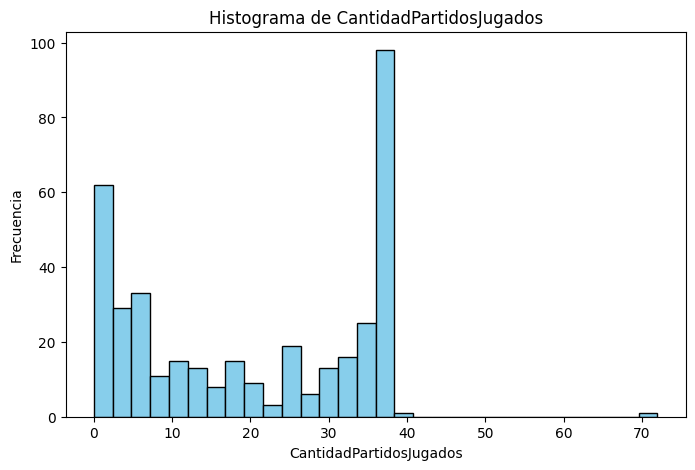

In [50]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['CantidadPartidosJugados'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CantidadPartidosJugados')
plt.ylabel('Frecuencia')
plt.title('Histograma de CantidadPartidosJugados')
plt.show()

In [51]:
df_players.shape

(377, 90)

In [52]:
df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
].shape

(268, 90)

Los criterio para mantener a los jugadores en el conjunto de entrenamiento serán:
- Jugadores que hayan disputado más de 5 partido 
- Jugadores que hayan disputado más de 3 minutos por partido en promedio

O bien:
- Jugadores que hayan jugado mas de 60 minutos durante toda la temporada

In [53]:
df_train = df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
]


In [54]:
df_train.columns

Index(['NombreCompleto', 'Puntos_suma', 'ReboteDefensivo_suma',
       'ReboteOfensivo_suma', 'RebotesTotales_suma', 'Asistencias_suma',
       'Recuperaciones_suma', 'Perdidas_suma', 'TaponCometido_suma',
       'TaponRecibido_suma', 'FaltaCometida_suma', 'FaltaRecibida_suma',
       'Valoracion_suma', 'TirosDosAciertos_suma', 'TirosDosFallos_suma',
       'TirosTresAciertos_suma', 'TirosTresFallos_suma',
       'TirosLibresAciertos_suma', 'TirosLibresFallos_suma', 'plus_minus_suma',
       'plays_consumidas_suma', 'plays_jugadas_suma', 'rebote_of_disp_suma',
       'rebote_def_disp_suma', 'puntos_q4_y_prorroga_suma',
       'puntos_clutch_suma', 'min_q4_suma', 'min_q4_y_prorroga_suma',
       'min_clutch_suma', 'posesiones_finalizadas_suma',
       'TiempoJuego_seg_suma', 'TiempoJuego_min_suma', 'IdJugador', 'IdClub',
       'IdEquipo', 'Nombre', 'TiempoJuego', 'CincoInicial', 'equipo',
       'partido_key', 'nacionalidad', 'rival', 'fecha_hora',
       'Puntos_prom_40min', 'ReboteDe

In [55]:
variables_standar = ['NombreCompleto', 'Nombre', 'nacionalidad', 'CincoInicial', 'equipo', 
'Puntos_prom_40min','ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
'Asistencias_prom_40min','Recuperaciones_prom_40min', 'Perdidas_prom_40min',
'TaponCometido_prom_40min', 'TaponRecibido_prom_40min',
'FaltaCometida_prom_40min', 'FaltaRecibida_prom_40min',
'Valoracion_prom_40min', 'TirosDosAciertos_prom_40min',
'TirosDosFallos_prom_40min', 'TirosTresAciertos_prom_40min',
'TirosTresFallos_prom_40min', 'TirosLibresAciertos_prom_40min',
'TirosLibresFallos_prom_40min', 'plus_minus_prom_40min',
'plays_consumidas_prom_40min', 'plays_jugadas_prom_40min',
'rebote_of_disp_prom_40min', 'rebote_def_disp_prom_40min',
'puntos_q4pror_prom_10min', 'puntos_clutch_prom_5min',
'puntos_q4_y_prorroga_suma', 'puntos_clutch_suma', 'min_q4_suma',
'min_q4_y_prorroga_suma', 'min_clutch_suma',
'posesiones_finalizadas_prom_40min', 
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', '3PT%', 'TS%', 'USG%', 'AST/TOVr',
'CantidadPartidosJugados', 'game_score_prom','MinutosJugadosPorPartido']
df_train[variables_standar]

,NombreCompleto,Nombre,nacionalidad,CincoInicial,equipo,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,puntos_q4pror_prom_10min,puntos_clutch_prom_5min,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_prom_40min,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM","AALIYA, L.",Argentino,False,INSTITUTO,16.716482,5.251921,2.690009,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,5.133521,0.664011,104.0,2.0,202.59,202.59,15.06,15.281810,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,34,6.870588,18.368627
2,"ACEVEDO, SEBASTIAN IGNACIO","ACEVEDO, S.",Argentino,True,SAN MARTIN (C),13.538120,4.940226,1.140052,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,2.564103,1.341382,64.0,12.0,242.03,249.60,44.73,12.502573,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,38,6.300000,22.159649
4,"ACUÑA, ROBERTO SANTIAGO","ACUÑA, R.",Argentino,False,INSTITUTO,12.969353,5.784453,2.983560,1.217780,0.974224,1.704891,0.669779,0.608890,4.810229,2.922671,14.491577,5.297341,3.592450,0.121778,0.913335,2.009336,1.400447,6.941344,13.091131,83.539679,36.472498,36.350721,3.387916,0.614628,48.0,2.0,141.68,141.68,16.27,10.146539,13.023256,55.214724,8.180301,15.912898,12.040134,0.202454,11.764706,56.757621,15.670554,0.714286,35,5.594286,18.769524
5,"AGUERRE, FEDERICO MATIAS","AGUERRE, F.",Argentino,True,RIACHUELO (LR),13.194345,7.453948,1.456519,1.585035,0.728259,1.370841,0.556904,0.171355,2.955876,3.212909,17.521062,2.184778,2.141939,2.184778,3.427103,2.270456,0.599743,3.084392,12.637441,77.024133,29.987148,38.554905,2.870323,0.860956,56.0,8.0,195.10,195.10,46.46,11.115808,10.847458,54.956897,4.857143,19.333333,13.000000,0.228448,38.931298,58.895518,16.407119,1.156250,36,8.366667,25.937037
6,"AGUIRRE, GUSTAVO NICOLAS","AGUIRRE, G.",Argentino,True,REGATAS (C),10.754585,6.478665,0.863822,3.844008,1.338924,1.900409,0.000000,0.129573,2.375511,3.196142,15.160077,2.289128,2.289128,1.554880,4.275919,1.511689,0.345529,0.691058,13.130095,85.302428,37.360304,39.951770,2.023121,2.074689,42.0,23.0,203.00,207.60,55.43,12.262818,14.473684,44.398340,2.312139,16.216216,9.497207,0.145228,26.666667,47.899354,15.392405,2.022727,34,7.641176,27.238725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,"WATSON, EARL OVREL","WATSON, E.",Estadounidense,False,ATENAS (C),9.504380,7.200288,5.184207,0.864035,1.728069,2.304092,0.288012,0.576023,2.880115,3.456138,13.536541,4.032161,6.624265,0.000000,0.000000,1.440058,2.304092,-4.608184,14.688588,111.172447,50.978039,48.385935,0.441696,0.000000,2.0,0.0,45.28,45.28,0.74,9.458298,15.686275,37.837838,10.169492,14.880952,12.463768,0.135135,NaN,38.623596,13.212435,0.375000,12,2.966667,11.573611
371,"WHELAN, GASTON","WHELAN, G.",Argentino,True,UNION (SF),19.985110,4.367607,0.727934,4.764662,1.389693,2.779386,0.066176,0.397055,3.904376,7.742576,23.624783,4.897014,3.970552,1.455869,2.713210,5.823476

In [97]:
# Filtrar filas donde la columna 'Nombre' contiene 'SCHATTMANN' (insensible a mayúsculas)
df_players[df_players['NombreCompleto'].str.contains('DOS SANTOS', na=False, case=False)]

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
138,"FRANCA DOS SANTOS, JOAO VITOR",231.0,79.0,31.0,110.0,4.0,4.0,7.0,14.0,4.0,24.0,95.0,324.0,75.0,50.0,2.0,9.0,75.0,40.0,19.0,194.0,757.0,340.0,357.0,55.0,2.0,70.92,70.92,5.88,162.6,20299.0,338.316667,326647,1882,69822,"FRANCA, J.",30:51,True,OLIMPICO (LB),OLIMPICO (LB) vs LA UNION FSA. (017/11/2024 22...,Brasileño,LA UNION FSA.,17/11/2024,27.31169,9.340362,3.665205,13.005567,0.47293,0.47293,0.827627,1.655254,0.47293,2.837578,11.23208,38.307306,8.867432,5.911621,0.236465,1.064092,8.867432,4.729297,2.246416,22.93709,89.501946,40.199025,42.208976,8.385044,8.385044,0.695207,19.224592,2400.0,40.0,136.0,3.608247,57.352941,9.117647,22.128852,15.781923,0.551471,18.181818,61.897106,25.627477,0.571429,219.6,142.066421,1.70068,7.755217,14,15.685714,24.165476


## SOM con 9 nodos

In [80]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# --- 1. PREPARACIÓN DE DATOS ---


# Seleccionamos solo las variables numéricas para el entrenamiento
features_para_som = [ 
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', '3PT%', 'TS%', 'USG%', 'AST/TOVr','puntos_q4pror_prom_10min', 
]

# Creamos el set de datos con las variables correctas
df_som = df_train[features_para_som]

# Es crucial manejar valores nulos (NaN) antes de escalar
# Aquí los rellenamos con la media de cada columna, pero puedes elegir otra estrategia
df_som = df_som.fillna(df_som.mean())

# Convertimos los datos a un array de NumPy
df_som_np = df_som.values

# Escalamos los datos: fundamental para que ninguna variable domine por su escala
scaler = StandardScaler()
scaled_df_som = scaler.fit_transform(df_som_np)

# --- 2. INICIALIZACIÓN Y ENTRENAMIENTO DEL SOM ---

# Definimos las dimensiones del SOM para tener 8 nodos (4x2 = 8)
som_x = 3
som_y = 3
n_features = scaled_df_som.shape[1] # Número de variables estadísticas

# Inicializamos el SOM
# sigma: radio de la vecindad
# learning_rate: tasa de aprendizaje
# random_seed: para que los resultados sean reproducibles
som = MiniSom(x=som_x, y=som_y, 
              input_len=n_features, 
              sigma=1.0, 
              learning_rate=0.5, 
              random_seed=1511)

# Inicializamos los pesos del SOM
som.random_weights_init(scaled_df_som)

print("Entrenando el SOM...")
# Entrenamos el SOM con nuestros datos
# num_iteration puede ajustarse para mejorar el resultado
som.train_random(data=scaled_df_som, num_iteration=1000)
print("¡Entrenamiento completado!")

# --- 3. OBTENCIÓN DE RESULTADOS ---

# Obtenemos el nodo "ganador" (el más parecido) para cada jugador
winning_nodes = [som.winner(x) for x in scaled_df_som]

# Agregamos las coordenadas del nodo a nuestro DataFrame original
# Esto nos dice a qué grupo (de los 8) pertenece cada jugador
df_train['SOM_Nodo'] = winning_nodes

# Mostramos los primeros resultados
print("\nDataFrame con la asignación de nodos del SOM:")
print(df_train[['NombreCompleto', 'equipo', 'SOM_Nodo']].head())


Entrenando el SOM...
¡Entrenamiento completado!

DataFrame con la asignación de nodos del SOM:
               NombreCompleto          equipo SOM_Nodo
0         AALIYA, LEE ABRAHAM       INSTITUTO   (1, 1)
2  ACEVEDO, SEBASTIAN IGNACIO  SAN MARTIN (C)   (1, 1)
4     ACUÑA, ROBERTO SANTIAGO       INSTITUTO   (0, 2)
5    AGUERRE, FEDERICO MATIAS  RIACHUELO (LR)   (1, 2)
6    AGUIRRE, GUSTAVO NICOLAS     REGATAS (C)   (1, 2)


C:\Users\roman.landa\AppData\Local\Temp\ipykernel_21032\2131829361.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SOM_Nodo'] = winning_nodes


In [81]:
df_train['SOM_Nodo'].value_counts().sort_index()

SOM_Nodo
(0, 0)    30
(0, 1)    19
(0, 2)    20
(1, 0)    57
(1, 1)    51
(1, 2)    31
(2, 0)    20
(2, 1)    18
(2, 2)    22
Name: count, dtype: int64

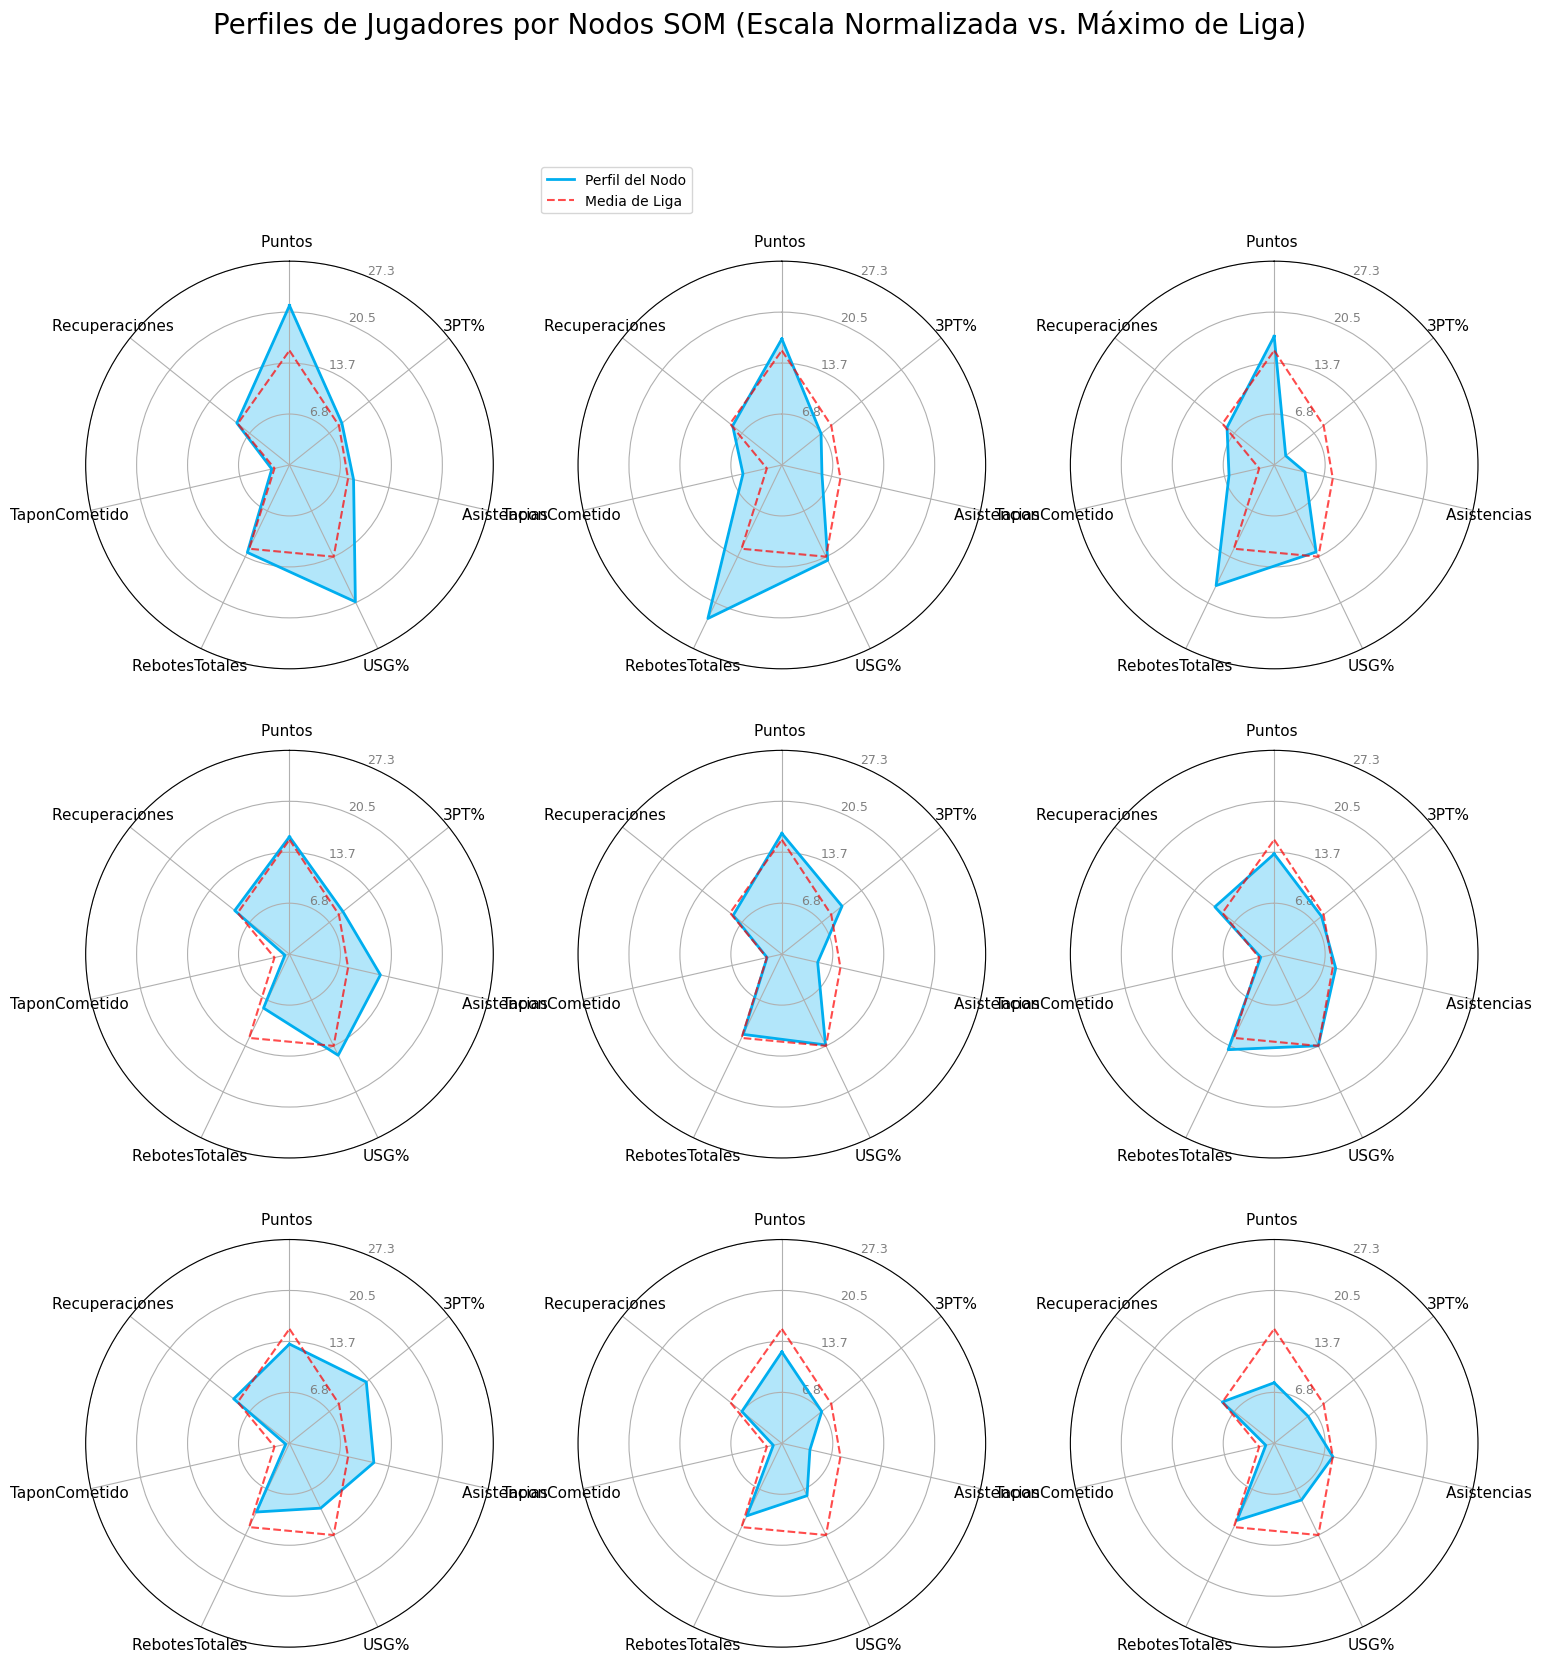

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

# Silenciar un warning común de matplotlib en el entorno polar
warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Definición de Variables (3x3 SOM) ---

features_para_visualizar = [
    'Puntos_prom_40min',
    '3PT%',
    'Asistencias_prom_40min',
    'USG%',
    'RebotesTotales_prom_40min', 
    'TaponCometido_prom_40min',
    'Recuperaciones_prom_40min',
]

som_x = 3
som_y = 3

# --- 2. Preparación de Datos Agregados y de Liga ---

# 2.1. Calcular la media de cada nodo (como ya hiciste)
df_grouped_means = df_train.groupby('SOM_Nodo')[features_para_visualizar].mean()

# 2.2. Calcular la media y el máximo de la LIGA (df_train completo)
liga_means = df_train[features_para_visualizar].mean()
# El máximo de la liga será el 100% de la escala de cada eje.
liga_max = df_train[features_para_visualizar].max()

# --- 3. Escalado Absoluto para el Radial Plot (Usando el Máximo de la Liga) ---

# Aplicamos el escalado usando los valores máximos de la liga (dividiendo por liga_max)

# Escalado de las medias de los nodos:
df_scaled_means = df_grouped_means / liga_max

# Escalado de la media de la liga para trazar la línea de referencia:
scaled_liga_means = liga_means / liga_max

# --- 4. Visualización con Radial Plots ---

# 4.1 Configuración de los ejes del Radial Plot
N = len(features_para_visualizar)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1] # Cerrar el círculo

# Etiquetas a mostrar en el gráfico (formateadas y sin 'prom 40min')
labels = [
    f.replace('_', ' ').replace('prom 40min', '') 
    for f in features_para_visualizar
]
labels += labels[:1]

# 4.2 Creación de la figura y los subplots
fig, axes = plt.subplots(
    som_x, som_y, 
    figsize=(18, 18), 
    subplot_kw=dict(polar=True)
)
fig.suptitle(
    'Perfiles de Jugadores por Nodos SOM (Escala Normalizada vs. Máximo de Liga)', 
    fontsize=20, 
    y=1.02
)

axes = axes.flatten()

# 4.3 Preparación de la Línea Media de la Liga
# Los valores escalados + el primero para cerrar la línea
liga_line_data = scaled_liga_means.values.flatten().tolist()
liga_line_data += liga_line_data[:1]

# 4.4 Generación de los plots (Itera sobre cada nodo)
for i, (node_coord, data_series) in enumerate(df_scaled_means.iterrows()):
    ax = axes[i]
    
    # Obtener y cerrar los datos del perfil para el nodo actual
    data_list = data_series.values.flatten().tolist()
    data_list += data_list[:1]
    
    # ------------------- TRAZADO DEL PERFIL DEL NODO -------------------
    ax.fill(angles, data_list, color='#00AEEF', alpha=0.3)
    ax.plot(angles, data_list, color='#00AEEF', linewidth=2, label='Perfil del Nodo')

    # ------------------- TRAZADO DE LA MEDIA DE LA LIGA -------------------
    ax.plot(angles, liga_line_data, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Media de Liga')
    
    # ------------------- CONFIGURACIÓN DE EJES Y ETIQUETAS -------------------
    ax.set_theta_offset(np.pi / 2) 
    ax.set_theta_direction(-1)     
    
    # Colocar las etiquetas de las variables
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], fontsize=11)
    
    # Configurar el rango radial (0 a 1) y los valores absolutos
    ax.set_ylim(0, 1.0) # El rango siempre es de 0 a 1

    # Definir los puntos de referencia para los valores absolutos (0.25, 0.50, 0.75, 1.0)
    yticks = [0.25, 0.5, 0.75, 1.0]
    
    # Crear las etiquetas de los valores absolutos para el EJE VERTICAL (e.g., Minutos Jugados)
    yticklabels = []
    # Usamos la primera variable ('Puntos') para etiquetar los y-ticks principales, 
    # ya que es difícil etiquetar todas las 6 en el centro.
    for y in yticks:
        # El valor real es el valor escalado * el máximo de la liga para esa variable
        val_absoluto = liga_max['Puntos_prom_40min'] * y
        yticklabels.append(f"{val_absoluto:.1f}")

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, color="grey", size=9)
    
    
    # Añadir la leyenda solo al primer gráfico para no saturar
    if i == 0:
        ax.legend(loc='lower left', bbox_to_anchor=(1.1, 1.1), fontsize=10)


# 4.5 Añadir los valores máximos de la liga en el exterior del gráfico
max_text = "Máximos de la Liga (1.0 en la escala):\n"
for label, max_val in liga_max.items():
     # Usamos las etiquetas formateadas (Puntos/40, Asistencias/40, etc.)
    formatted_label = label.replace('_', ' ').replace('prom 40min', '/40')
    max_text += f"• {formatted_label}: {max_val:.2f}\n"



In [83]:
# Variables de jugador a mostrar
columnas_jugador = ['NombreCompleto', 'equipo', 'nacionalidad', 'MinutosJugadosPorPartido', '3PT%'] 
# NOTA: Asegúrate de usar 'Nacionalidad' con mayúscula si así está en tu df_train.

# 1. Crear un DataFrame para el cálculo de distancia y otro para la información original.
# Usamos df_train.index como identificador.

# DataFrame que solo contiene los datos de jugador REALES y el nodo asignado.
df_jugadores_reales = df_train[columnas_jugador + ['SOM_Nodo']].copy()

# DataFrame de trabajo que añade las features ESCALADAS (solo para el cálculo de distancia)
df_calculo = df_jugadores_reales.copy()
df_calculo[features_para_som] = scaled_df_som # Aquí sí incluimos los datos escalados

print("--- JUGADORES MÁS CARACTERÍSTICOS POR CLÚSTER SOM ---")

# 2. Iterar sobre cada nodo (3x3 = 9 nodos)
for i in range(3):
    for j in range(3):
        nodo_actual = (i, j)
        
        # 3. Filtrar los jugadores asignados a este nodo
        df_nodo_calculo = df_calculo[df_calculo['SOM_Nodo'] == nodo_actual].copy()
        
        if df_nodo_calculo.empty:
            print(f"\nCluster {nodo_actual}: Sin jugadores asignados.")
            continue
            
        # Obtener el vector de pesos (el centroide) del nodo
        peso_nodo = som.get_weights()[i, j]
        
        # 4. Calcular la Distancia Euclidiana (usando las columnas escaladas)
        # La distancia se calcula entre el vector ESCALADO del jugador y el vector de pesos del nodo.
        distancias = np.linalg.norm(df_nodo_calculo[features_para_som].values - peso_nodo, axis=1)
        
        df_nodo_calculo['Distancia_al_Centro'] = distancias
        
        # 5. Seleccionar los 5 jugadores con la menor distancia (los más cercanos/característicos)
        # Esto nos da el índice de los top 5.
        top_indices = df_nodo_calculo.sort_values(by='Distancia_al_Centro', ascending=True).head(10).index
        
        # 6. Usar el índice para obtener los datos REALES y la distancia final
        top_5_jugadores = df_jugadores_reales.loc[top_indices].copy()
        
        # Añadir la columna de distancia calculada previamente
        top_5_jugadores['Distancia_al_Centro'] = df_nodo_calculo.loc[top_indices]['Distancia_al_Centro']
        
        # 7. Imprimir resultados
        print(f"\n=======================================================")
        print(f"  CLUSTER {nodo_actual}: {len(df_nodo_calculo)} JUGADORES ASIGNADOS")
        print(f"=======================================================")
        
        # Mostrar las columnas solicitadas
        print(top_5_jugadores[columnas_jugador + ['Distancia_al_Centro']].to_string(index=False))

--- JUGADORES MÁS CARACTERÍSTICOS POR CLÚSTER SOM ---

  CLUSTER (0, 0): 30 JUGADORES ASIGNADOS
              NombreCompleto        equipo   nacionalidad  MinutosJugadosPorPartido      3PT%  Distancia_al_Centro
     FERGUSON, ROMEAO VENILL LA UNION FSA. Estadounidense                 30.549074 34.343434             0.430696
               NEGRETE, ALEX     INSTITUTO      Argentino                 23.969792 35.922330             0.711515
     THOMAS JR, MARCUS WILEY PEÑAROL (MDP) Estadounidense                 28.088596 34.375000             1.058361
     BOND JR, TIMOTHY LAMONT      PLATENSE Estadounidense                 26.168519 29.729730             1.206741
     ROBINSON, BRANDON LAMAR        QUIMSA Estadounidense                 24.948148 34.831461             1.210144
    POMOLI LARRABURU, NICOLA     INSTITUTO      Argentino                 22.204955 34.177215             1.468798
         NATION, ANDRE JAMES GIMNASIA (CR)      Argentino                 28.038158 27.631579      

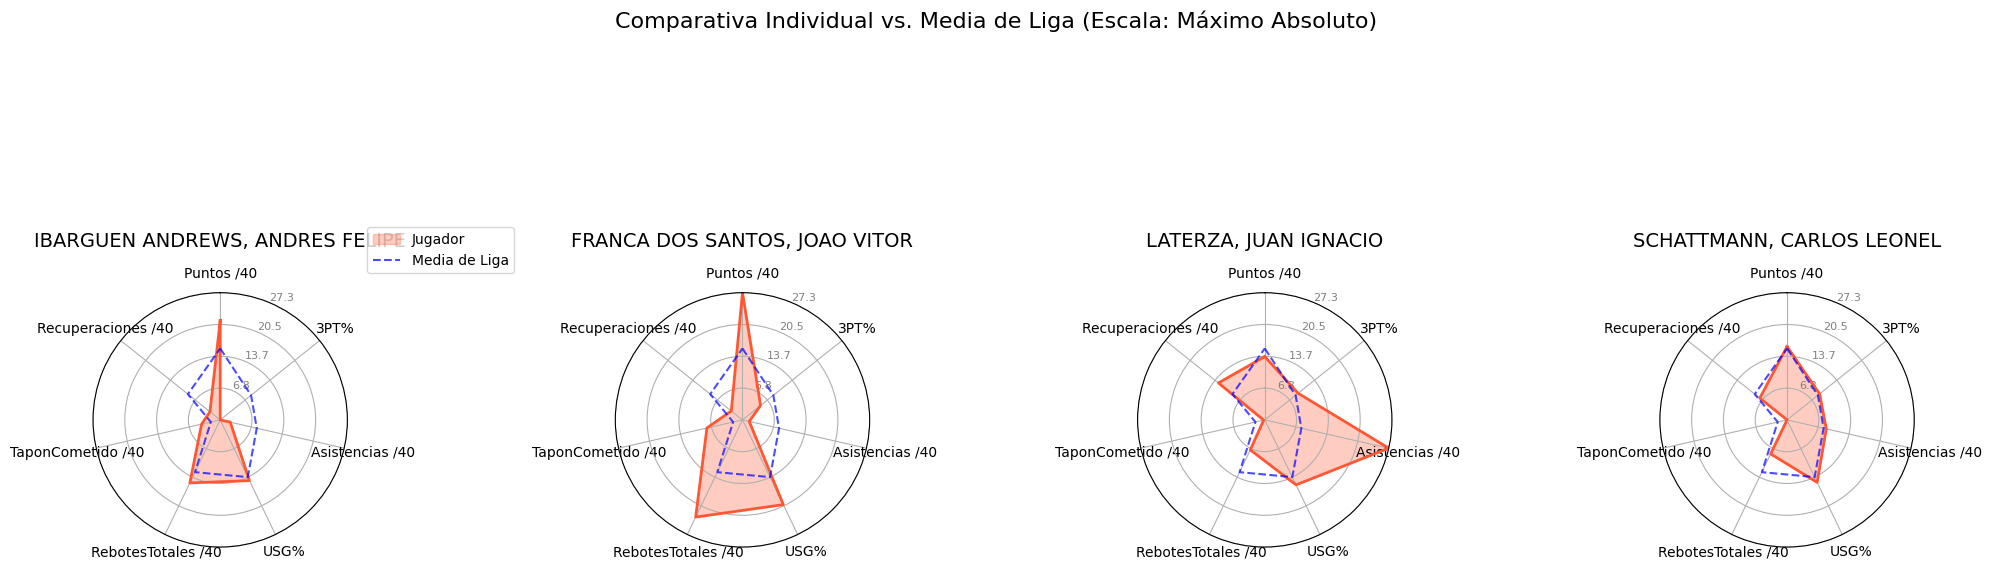

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_jugador_vs_liga(lista_jugadores, df_train, features_para_visualizar, liga_max, scaled_liga_means):
    """
    Genera un gráfico radial para uno o varios jugadores comparando sus estadísticas
    contra la media de la liga. Las estadísticas se escalan por el máximo absoluto
    de la liga (liga_max) para que el borde del gráfico sea el valor máximo de la liga.

    Args:
        lista_jugadores (list): Lista de cadenas con los 'NombreCompleto' de los jugadores.
        df_train (pd.DataFrame): DataFrame original que contiene las estadísticas.
        features_para_visualizar (list): Lista de las columnas a graficar.
        liga_max (pd.Series): Valores máximos absolutos de la liga (para la escala 1.0).
        scaled_liga_means (pd.Series): Valores de la media de la liga escalados por liga_max.
    """
    
    # 1. Configuración de los ejes radiales
    N = len(features_para_visualizar)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1] # Cerrar el círculo

    # Etiquetas de los ejes
    labels = [f.replace('_', ' ').replace('prom 40min', '/40') for f in features_para_visualizar]
    labels += labels[:1]

    # Línea de la media de la liga (escalada)
    liga_line_data = scaled_liga_means.values.flatten().tolist()
    liga_line_data += liga_line_data[:1]

    # 2. Preparación de la figura
    n_jugadores = len(lista_jugadores)
    
    # Determinar el layout (ejemplo: si son 3, 1 fila, 3 columnas; si son 4, 2x2, etc.)
    if n_jugadores == 0:
        print("La lista de jugadores está vacía.")
        return
    elif n_jugadores == 1:
        nrows, ncols = 1, 1
        figsize = (10, 10)
    elif n_jugadores <= 4:
        nrows, ncols = 1, n_jugadores
        figsize = (5 * n_jugadores, 7)
    else:
        # Para más de 4, intenta un layout cuadrado o casi cuadrado
        ncols = int(np.ceil(np.sqrt(n_jugadores)))
        nrows = int(np.ceil(n_jugadores / ncols))
        figsize = (5 * ncols, 5 * nrows)


    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw=dict(polar=True))
    axes = np.atleast_1d(axes).flatten() # Asegurar que axes sea iterable incluso con 1 subplot

    fig.suptitle(
        'Comparativa Individual vs. Media de Liga (Escala: Máximo Absoluto)', 
        fontsize=16, 
        y=1.05
    )

    # 3. Generación de los plots
    for i, nombre_jugador in enumerate(lista_jugadores):
        ax = axes[i]
        
        # Filtrar datos del jugador (usando .iloc[0] ya que 'NombreCompleto' es único)
        jugador_data = df_train[df_train['NombreCompleto'] == nombre_jugador]

        if jugador_data.empty:
            ax.set_title(f"Jugador no encontrado: {nombre_jugador}", size=12)
            continue
        
        # 3.1. Escalado del jugador
        # El perfil del jugador se escala dividiendo sus valores por el máximo de la liga.
        perfil_jugador = jugador_data[features_para_visualizar].iloc[0] / liga_max
        data_list = perfil_jugador.values.flatten().tolist()
        data_list += data_list[:1]
        
        # 3.2. Trazado
        # Perfil del Jugador
        ax.fill(angles, data_list, color='#FF5733', alpha=0.3, label='Jugador')
        ax.plot(angles, data_list, color='#FF5733', linewidth=2)

        # Media de la Liga (Línea de Referencia)
        ax.plot(angles, liga_line_data, color='blue', linestyle='--', linewidth=1.5, alpha=0.7, label='Media de Liga')
        
        # 3.3. Configuración de Ejes
        ax.set_theta_offset(np.pi / 2) 
        ax.set_theta_direction(-1)     
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels[:-1], fontsize=10)
        ax.set_ylim(0, 1.0) 

        # Configurar Y-Ticks con valores absolutos (basado en la primera feature, Puntos/40)
        yticks = [0.25, 0.5, 0.75, 1.0]
        yticklabels = [f"{liga_max[features_para_visualizar[0]] * y:.1f}" for y in yticks]

        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels, color="grey", size=8)
        
        # Título
        ax.set_title(nombre_jugador, size=14, y=1.15)
        
        # Leyenda (solo en el primer gráfico)
        if i == 0:
            ax.legend(loc='lower left', bbox_to_anchor=(1.05, 1.05), fontsize=10)

    # Ocultar subplots no utilizados
    for j in range(n_jugadores, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    # plt.savefig('jugadores_vs_liga.png') # Si quieres guardar el archivo

# --- EJEMPLO DE USO (ASUMIENDO QUE LAS VARIABLES EXISTEN) ---

# Paso 1: Requerir las variables de tu análisis anterior (liga_max, scaled_liga_means)
# Puedes calcularlas con:
liga_max = df_train[features_para_visualizar].max()
scaled_liga_means = df_train[features_para_visualizar].mean() / liga_max

# Paso 2: Usar la función con la lista de jugadores de tu último clúster:
jugadores_a_graficar = [
    'IBARGUEN ANDREWS, ANDRES FELIPE', # mayor TS%
    'FRANCA DOS SANTOS, JOAO VITOR', # mayor puntos
    'LATERZA, JUAN IGNACIO', # mayor asistencias
    #'CORBALAN, JUAN PABLO' # mayor USG%
    'SCHATTMANN, CARLOS LEONEL'
]
plot_jugador_vs_liga(jugadores_a_graficar, df_train, features_para_visualizar, liga_max, scaled_liga_means)

In [68]:
# Mostrar el registro con mayor 'Puntos_prom_40min'
max_idx = df_train['3PT%'].idxmax()
df_train.loc[[max_idx]]

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido,SOM_Nodo
196,"LADO, MOGGA CHARLES ARNADO",47.0,13.0,12.0,25.0,5.0,1.0,9.0,1.0,4.0,21.0,19.0,48.0,16.0,10.0,1.0,0.0,12.0,6.0,-8.0,45.0,355.0,156.0,154.0,9.0,3.0,25.25,30.23,9.11,31.92,9388.0,156.466667,326914,46,69144,"LADO, M.",06:30,False,FERRO,FERRO vs BOCA (003/12/2024 21:05),Argentino,BOCA,03/12/2024,12.015339,3.323392,3.067746,6.391138,1.278228,0.255646,2.30081,0.255646,1.022582,5.368556,4.857265,12.270984,4.090328,2.556455,0.255646,0.0,3.067746,1.533873,-2.045164,11.504048,90.754154,39.880699,39.369408,6.455049,7.728164,2.328931,8.160205,2400.0,40.0,27.0,20.0,64.814815,7.692308,8.441558,8.064516,0.444444,100.0,67.296678,12.676056,0.555556,36.6,147.243108,1.646542,2.977175,11,3.327273,14.224242,"(2, 0)"
